# 梯度下降法
> 不是一个机器学习，基于搜索的最优化方法，最小化一个损失函数。
> 梯度上升法：最大化效用函数。

Batch Gradient Descent  
Stochastic Gradient Descent  
    
    跳出局部最优解
    更快的运行速度
    随机的特点 随即搜索，随机森林
   
Mini-Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plot_x = np.linspace(-1., 6., 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [5]:
plot_y = (plot_x-2.5)**2 - 1.

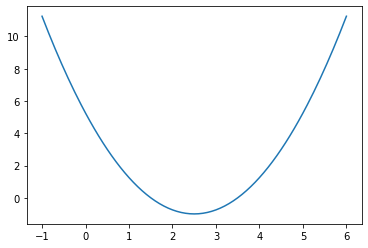

In [6]:
plt.plot(plot_x, plot_y)
plt.show()

## 简单梯度下降法

In [14]:
def J(theta):
    return (theta-2.5)**2 - 1.

def dJ(theta):
    return 2*(theta-2.5)

In [15]:
theta_history = []

def gradient_descent(initial_theta, lr, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - lr * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show()

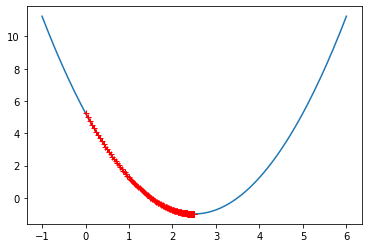

In [16]:
eta = 0.01
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

## 线性模型中梯度下降法

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [19]:
x.shape

(100,)

In [22]:
X = x.reshape(-1,1)
print('X shape:{} ,y shape: {}'.format(X.shape,y.shape))

X shape:(100, 1) ,y shape: (100,)


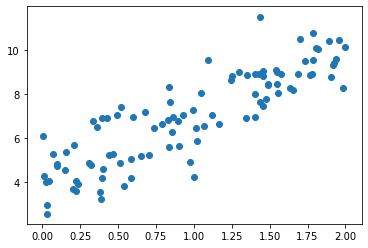

In [23]:
plt.scatter(x, y)
plt.show()

In [25]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, lr, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - lr * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
lr = 0.01

theta = gradient_descent(X_b, y, initial_theta, lr)
theta

array([4.02145786, 3.00706277])

## bosten数据集

### 向量化

In [36]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=666)

# 对数据进行归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [37]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

#　向量化　
def dJ(theta, X_b, y):
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, lr, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0
    
    # 两个停止条件，训练次数不超过n_iters ; J值差
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

from sklearn.metrics import r2_score
lr = 0.000001
X_b = np.hstack([np.ones((len(X_train_standard), 1)), X_train_standard])
initial_theta = np.zeros(X_b.shape[1])
theta = gradient_descent(X_b, y_train, initial_theta, lr)

X_b = np.hstack([np.ones((len(X_test_standard), 1)), X_test_standard])
predict = X_b.dot(theta)

score = r2_score(y_test, predict)
score


0.800927010538664

### SGD

In [50]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):
    
    # lr要随着迭代次数慢慢减少
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    m = len(X_b)
    for i_iter in range(n_iters):
        indexes = np.random.permutation(m) # 生成随机序列
        X_b_new = X_b[indexes,:]
        y_new = y[indexes]
        for i in range(m):
            gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
            theta = theta - learning_rate(i_iter * m + i) * gradient

    return theta

X_b = np.hstack([np.ones((len(X_train_standard), 1)), X_train_standard])
print(X_b.shape)
initial_theta = np.random.randn(X_b.shape[1])
theta = sgd(X_b, y_train, initial_theta)

X_b = np.hstack([np.ones((len(X_test_standard), 1)), X_test_standard])
predict = X_b.dot(theta)

score = r2_score(y_test, predict)
score

(367, 14)


0.8028841069470718

### scilit-learn 中的SGD

In [62]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard, y_test)

0.7959917932582106

## 梯度计算调试

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [69]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [70]:
X.shape

(1000, 10)

In [72]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
    
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

# 计算前后 +- epsilon的值，　导数的公式
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [73]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

CPU times: user 19.9 s, sys: 12.7 s, total: 32.6 s
Wall time: 8.73 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [74]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

CPU times: user 2.53 s, sys: 1.39 s, total: 3.92 s
Wall time: 1.03 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])